## Hate Speech Detection

Here the model the classification model from Indonesian Hate Speech Dataet (https://github.com/ialfina/id-hatespeech-detection).
We will create model to detect hate speech.

In [279]:
!pip install Sastrawi
!pip install nltk
!pip install textblob

In [280]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RIZQI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIZQI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
df = pd.read_csv('data/hate-speech/IDHSD_RIO_unbalanced_713_2017.txt', sep='\t', header=None, names=['label', 'tweet'], skiprows=1, engine='python')
df.head()

,label,tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


### Exploratory Data Analysis

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   713 non-null    object
 1   tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


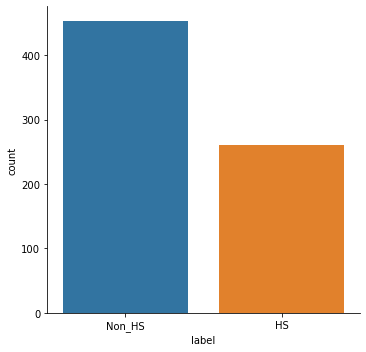

In [181]:
sns.catplot(x='label', kind='count', data=df, orient='h')

### Data Preprocessing

In [182]:
# Label Encoding
le = preprocessing.LabelEncoder()
le.fit(df['label'])

LabelEncoder()

In [217]:
# le.classes_

In [184]:
df['label'] = le.transform(df['label'])
df.head()

,label,tweet
0,1,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,1,RT @baguscondromowo: Mereka terus melukai aksi...
2,1,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,1,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,1,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [199]:
df.head()

,label,tweet
0,1,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,1,RT @baguscondromowo: Mereka terus melukai aksi...
2,1,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,1,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,1,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [213]:
# Filtering
def filtering(tweet):
    result = re.sub('[^A-Za-z0-9]+', ' ', tweet)
    result = re.sub('https ', '', result)
    return result

df['tweet_filtering'] = df['tweet'].apply(filtering)
df.head()

,label,tweet,tweet_filtering
0,1,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,RT spardaxyz Fadli Zon Minta Mendagri Segera M...
1,1,RT @baguscondromowo: Mereka terus melukai aksi...,RT baguscondromowo Mereka terus melukai aksi d...
2,1,Sylvi: bagaimana gurbernur melakukan kekerasan...,Sylvi bagaimana gurbernur melakukan kekerasan ...
3,1,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",Ahmad Dhani Tak Puas Debat Pilkada Masalah Jal...
4,1,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,RT lisdaulay28 Waspada KTP palsu kawal PILKADA...


In [216]:
# Stemming
def stemming(tweet):
    stemmer = StemmerFactory().create_stemmer()
    result = stemmer.stem(tweet)
    return result

df['tweet_stemming'] = df['tweet_filtering'].apply(stemming)
df.head()

,label,tweet,tweet_filtering,tweet_stemming
0,1,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,RT spardaxyz Fadli Zon Minta Mendagri Segera M...,rt spardaxyz fadli zon minta mendagri segera n...
1,1,RT @baguscondromowo: Mereka terus melukai aksi...,RT baguscondromowo Mereka terus melukai aksi d...,rt baguscondromowo mereka terus luka aksi dala...
2,1,Sylvi: bagaimana gurbernur melakukan kekerasan...,Sylvi bagaimana gurbernur melakukan kekerasan ...,sylvi bagaimana gurbernur laku keras perempuan...
3,1,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",Ahmad Dhani Tak Puas Debat Pilkada Masalah Jal...,ahmad dhani tak puas debat pilkada masalah jal...
4,1,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,RT lisdaulay28 Waspada KTP palsu kawal PILKADA...,rt lisdaulay28 waspada ktp palsu kawal pilkada...


In [231]:
# Remove Stop Words
sw = stopwords.words('indonesian')

In [232]:
# Lemmatization

In [234]:
vect = TfidfVectorizer(stop_words=sw)
x = df['tweet_stemming']
y = df['label']

# vectorizer
x = vect.fit_transform(x)

# secara default 75 25
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [253]:
list_model = []
list_acc = []
list_precision = []
list_recall = []

def evaluation(m):
    model = m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(metrics.accuracy_score(y_test, y_pred),2)
    prec = round(metrics.precision_score(y_test, y_pred),2)
    recall = round(metrics.recall_score(y_test, y_pred),2)
    list_model.append(str(model).split('(')[0])
    list_acc.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    #print(f"""{str(model).split('(')[0]} \nAccuracy : {acc} \nPrecision : {prec} \nRecall : {recall}""")
    print(f"""Algorithm : {str(model).split('(')[0]} \n {classification_report(y_test,y_pred)} """)

In [282]:
evaluation(SVC())

Algorithm : SVC 
               precision    recall  f1-score   support

           0       0.97      0.55      0.71        65
           1       0.80      0.99      0.88       114

    accuracy                           0.83       179
   macro avg       0.88      0.77      0.79       179
weighted avg       0.86      0.83      0.82       179
 


In [283]:
evaluation(KNeighborsClassifier())

Algorithm : KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75        65
           1       0.84      0.91      0.87       114

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179
 


In [284]:
evaluation(tree.DecisionTreeClassifier())

Algorithm : DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73        65
           1       0.83      0.90      0.87       114

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179
 


In [285]:
evaluation(RandomForestClassifier())

Algorithm : RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.97      0.60      0.74        65
           1       0.81      0.99      0.89       114

    accuracy                           0.85       179
   macro avg       0.89      0.80      0.82       179
weighted avg       0.87      0.85      0.84       179
 


In [258]:
df_summary = pd.DataFrame({'Algoritma' : list_model, 'Accuracy' : list_acc, 'Precision' : list_precision, 'Recall' : list_recall})
df_summary.sort_values(by='Accuracy',ascending=False)

,Algoritma,Accuracy,Precision,Recall
3,RandomForestClassifier,0.86,0.82,0.99
0,SVC,0.83,0.80,0.99
1,KNeighborsClassifier,0.83,0.84,0.91
2,DecisionTreeClassifier,0.80,0.84,0.85


In [244]:
# Model Initiation
model = RandomForestClassifier()
round(cross_val_score(model,x,y,cv=20).mean(),2)

0.84

In [245]:
# Hyperparameter tuning
param_grid = {'criterion' : ['gini','entropy'],
'max_features' : ['auto','sqrt','log2'],
'n_estimators' : [100,200,300],
'class_weight' : ['balanced','balanced_subsample']}

gsv = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,n_jobs=4,cv=5)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
0.8317837092484981


In [273]:
model = RandomForestClassifier(**gsv.best_params_)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        42
           1       0.98      0.82      0.89       137

    accuracy                           0.85       179
   macro avg       0.80      0.88      0.82       179
weighted avg       0.90      0.85      0.86       179



In [275]:
cross_val_score(model,x,y,cv=5).mean()

0.8219639515414163

After the prediction process using Random Forest Classifier Algorithm and evaluation process using cross validation, it obtained accuracy of **82.19%**. This means that this algorithm has an error tolerance of **17.81 %**.

In [ ]:
# end